# **Data Assessment 1**


---





### **1. Data Handling & Exploration**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_id = '1ru0jgl-34s4N4gs1WPug3NAJNpO4x_-_'
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_excel(url)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59317 entries, 0 to 59316
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   login        59317 non-null  int64  
 1   ticket       59317 non-null  int64  
 2   symbol       59317 non-null  object 
 3   type         59317 non-null  object 
 4   open_time    59317 non-null  object 
 5   close_time   59317 non-null  object 
 6   open_price   59317 non-null  float64
 7   close_price  59317 non-null  float64
 8   stop loss    59317 non-null  float64
 9   take profit  59317 non-null  float64
 10  pips         59317 non-null  float64
 11  reason       59317 non-null  int64  
 12  volume       59317 non-null  int64  
 13  profit       59317 non-null  float64
dtypes: float64(6), int64(4), object(4)
memory usage: 6.3+ MB
None


In [4]:
print("Rows, Columns:", df.shape)

Rows, Columns: (59317, 14)


In [5]:
print("Column Names: ", df.columns.tolist())

Column Names:  ['login', 'ticket', 'symbol', 'type', 'open_time', 'close_time', 'open_price', 'close_price', 'stop loss', 'take profit', 'pips', 'reason', 'volume', 'profit']


In [6]:
print("Missing Values: ")
print(df.isnull().sum())

Missing Values: 
login          0
ticket         0
symbol         0
type           0
open_time      0
close_time     0
open_price     0
close_price    0
stop loss      0
take profit    0
pips           0
reason         0
volume         0
profit         0
dtype: int64


In [7]:
print("Number of duplicates:", df[df.duplicated()].shape[0])

Number of duplicates: 0


In [8]:
# Data Cleaning
df.columns = df.columns.str.replace(' ', '_')         #Renamed column like 'open time' to 'open_time' for easy use
df.applymap(lambda x: x.strip() if isinstance(x, str) else x)      # Removed all leading and trailing whitespaces
df['open_time'] = pd.to_datetime(df['open_time'], errors='coerce')     # Changed open and close time column type
df['close_time'] = pd.to_datetime(df['close_time'], errors='coerce')
col_list = ['open_price', 'close_price', 'stop_loss', 'take_profit', 'pips', 'volume', 'profit']      # List of crucial financial columns that contains numeric data
for i in col_list:
  df[i] = pd.to_numeric(df[i], errors='coerce').fillna(0).astype(float)      # Converted the data types to handle NaN, inconsistent, and non-numeric value and make sure that they all treated as floating point numbers
df['login'] = df['login'].astype(str)

# Data Wrangling
df['profitable'] = np.where(df['profit'] > 0,1,0)        # Created profitable flag
df['price_changed'] = abs(df['close_price'] - df['open_price'])    # Change of Price
df['pips_volume'] = df['pips'] / (df['volume'] + 1e-6)      # 1e-6 to prevent division by zero; for efficiency
# Trade Duration in hours and seconds
df['duration'] = df['close_time'] - df['open_time']
df['duration_sec'] = df['duration'].dt.total_seconds()
df['duration_hr'] = df['duration_sec'] / 3600

/tmp/ipython-input-3939950858.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: x.strip() if isinstance(x, str) else x)      # Removed all leading and trailing whitespaces


### **2. Profitablity Analysis**

In [9]:
profitable_login = df.groupby('login')['profit'].sum().reset_index()       # Total profits per Login
profitable_login = profitable_login.sort_values(by='profit', ascending=False)     # Rank logins by profitability
print("5 Most Profitable Logins:")
print(profitable_login.head(5))
print("")
print("5 Least Profitable Logins:")
print(profitable_login.tail(5))

5 Most Profitable Logins:
        login    profit
396  13378390  53891.98
514  55009560  28475.44
50   13088202  27848.61
146  13205503  27049.34
40   13070589  27023.68

5 Least Profitable Logins:
        login    profit
193  13251499 -11405.24
23   13018096 -12194.31
542  55011482 -12215.00
329  13333728 -13868.00
61   13103928 -14778.82


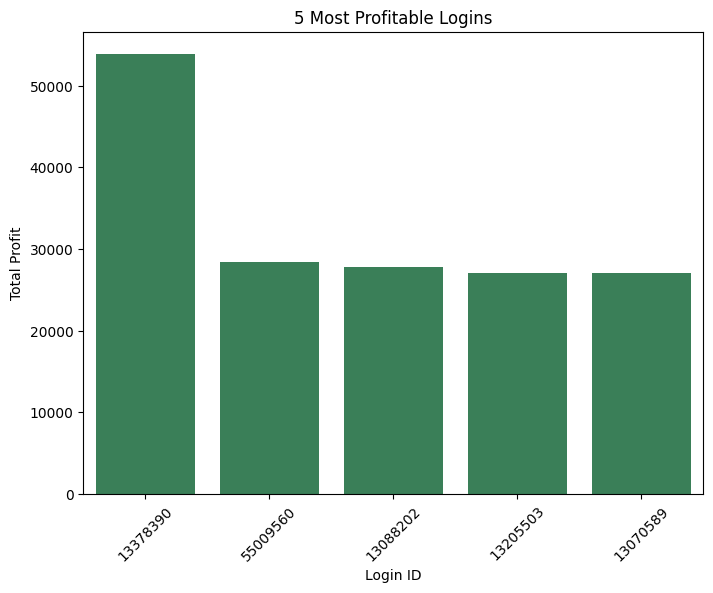

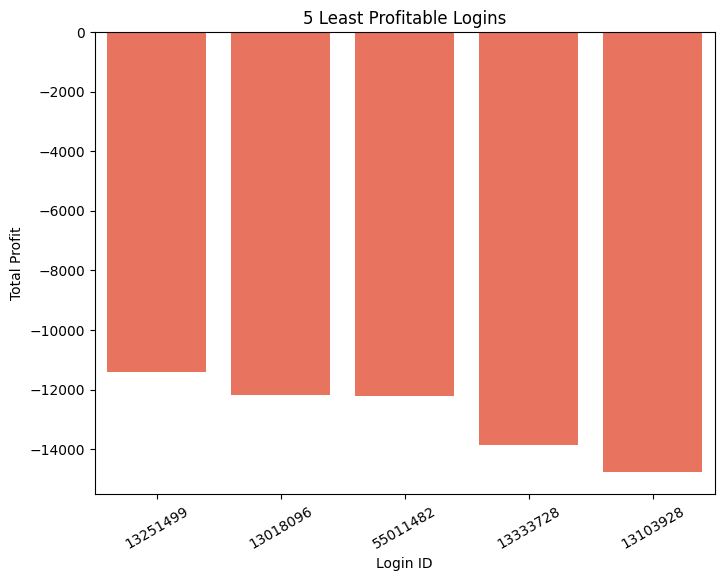

In [10]:
# Most profitable logins
plt.figure(figsize=(8,6))
sns.barplot(data=profitable_login.head(5), x='login', y='profit', color='seagreen')
plt.title("5 Most Profitable Logins")
plt.xlabel("Login ID")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

# Least profitable logins
plt.figure(figsize=(8,6))
sns.barplot(data=profitable_login.tail(5), x='login', y='profit', color='tomato')
plt.title("5 Least Profitable Logins")
plt.xlabel("Login ID")
plt.ylabel("Total Profit")
plt.xticks(rotation=30)
plt.show()



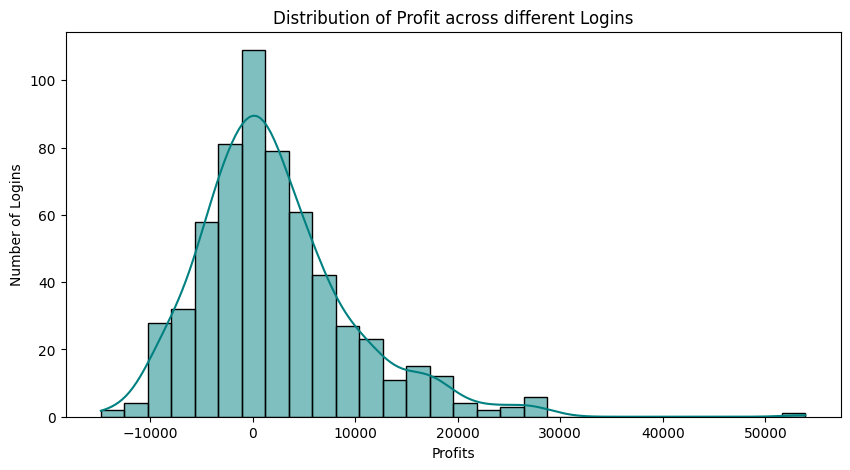

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(profitable_login['profit'], bins=30, kde=True, color='teal')
plt.title("Distribution of Profit across different Logins")
plt.xlabel("Profits")
plt.ylabel("Number of Logins")
plt.show()